Press run all afeter loading image zip file

In [106]:
! unzip '/content/10images.zip'

Archive:  /content/10images.zip
replace 1.tiff? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [107]:
import sys
import math
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from PIL import Image

In [108]:
#Calculate Intensity
def Intensity(red, blue, green):
      I=np.divide(blue + green + red, 3)
      return I,np.mean(I)

In [109]:
#Calculate Saturation
def Saturation(red, blue, green):
      minimum = np.minimum(np.minimum(red, green), blue)
      saturation = 1 - (3 / (red + green + blue+0.00001 ) * minimum)

      return saturation,np.mean(saturation)

In [110]:
#Calculate Hue
def Hue(red, blue, green):
  hue = np.copy(red)
  for i in range(0, blue.shape[0]):
      for j in range(0, blue.shape[1]):
          hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                      math.sqrt((red[i][j] - green[i][j])**2 +
                              ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
        
          hue[i][j] = math.acos(hue[i][j])

          if blue[i][j] <= green[i][j]:
              hue[i][j] = hue[i][j]
          else:
              hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]
  hue[np.isnan(hue)] = 0
  hue=hue*(180/(2*math.pi))
  return hue,np.mean(hue)


In [111]:
def Image_Plot(R,G,B,list):
  fig=plt.figure(figsize=(10,7))
   # Adds a subplot at the 1st position
  fig.add_subplot(1,4, 1)
    
  # showing image
  plt.imshow(R)
  plt.axis('off')
  plt.title(list[0])
    
  # Adds a subplot at the 2nd position
  fig.add_subplot(1,4, 2)
    
  # showing image
  plt.imshow(G)
  plt.axis('off')
  plt.title(list[1])
    
  # Adds a subplot at the 3rd position
  fig.add_subplot(1,4, 3)
    
  # showing image
  plt.imshow(B)
  plt.axis('off')
  plt.title(list[2])
  
  fig.add_subplot(1,4,4)
  rgb_uint8 = (np.dstack((R,G,B))) .astype(np.uint8)
  plt.imshow(rgb_uint8)
  plt.axis('off')
  plt.title("Combination of three planes")

In [112]:
# RGB to HSI
def Find_HSI(R,G,B):
    if R[1,1] >1 or G[1,1]>1 or B[1,1]>1 : 
      R=R/255
      G=G/255
      B=B/255
    H,H_avg=Hue(R,G,B)
    S,S_avg=Saturation(R, G, B)
    I,I_avg=Intensity(R,G,B)
    return H,H_avg,S,S_avg,I,I_avg

In [113]:
def task_1(R,G,B):     
      P=0.5
      R1=np.zeros((255,255))
      G1=np.zeros((255,255))
      B1=np.zeros((255,255))
      for i in range (0,255):
        for j in range(0,255):
              if R[i,j]!=G[i,j] or G[i,j]!=B[i,j]:
                  R1[i,j]=P*R[i,j]
                  G1[i,j]=P*G[i,j]
                  B1[i,j]=P*B[i,j]
              else:
                  R1[i,j]=R[i,j]
                  G1[i,j]=G[i,j]
                  B1[i,j]=B[i,j]
          
      return R1,G1,B1       

In [114]:
def task_2(R,G,B):
    R2=np.zeros((255,255))
    G2=np.zeros((255,255))
    B2=np.zeros((255,255))
    for i in range (0,255):
      for j in range(0,255):
          
            if R[i,j]==G[i,j] and  G[i,j]==B[i,j]:
                R2[i,j]=R[i,j]
                G2[i,j]=G[i,j]
                B2[i,j]=B[i,j]
            else:
                R2[i,j]=G[i,j]
                G2[i,j]=B[i,j]
                B2[i,j]=R[i,j]
      return R2,G2,B2          

In [115]:
def task_3(R,G,B):
      R3=np.zeros((255,255))
      G3=np.zeros((255,255))
      B3=np.zeros((255,255))
      R_avg=np.mean(R)
      G_avg=np.mean(G)
      B_avg=np.mean(B)
      m=min(R_avg,G_avg,B_avg)
      for i in range (0,255):
        for j in range(0,255):
              R3[i,j]=R[i,j] * np.uint8(m/R_avg)
              G3[i,j]=G[i,j] * np.uint8(m/G_avg)
              B3[i,j]=B[i,j] * np.uint8(m/B_avg)
      return R3,G3,B3        

# Testing on one Image

In [116]:
img=Image.open('/content/2.tiff')
img=np.array(img,dtype='float32')
R=img[:,:,0];G=img[:,:,1];B=img[:,:,2]
R1,G1,B1=task_1(R,G,B)
R2,G2,B2=task_2(R,G,B)
R3,G3,B3=task_3(R,G,B)
li1=['Red','Green','Blue']
li2=['Hue','Staturation','Intensity']

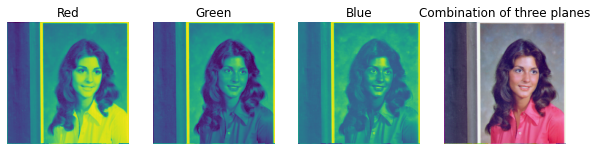

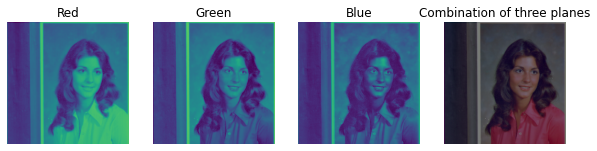

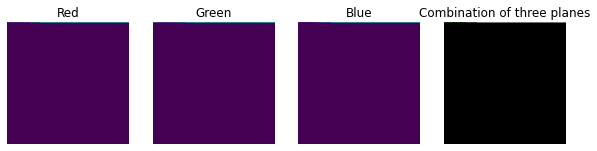

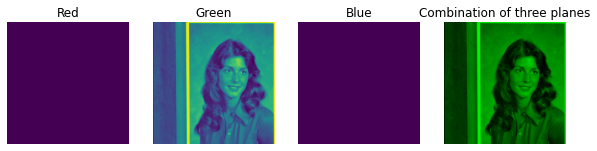

In [117]:
li1=['Red','Green','Blue']
Image_Plot(R,G,B,li1)
Image_Plot(R1,G1,B1,li1)
Image_Plot(R2,G2,B2,li1)
Image_Plot(R3,G3,B3,li1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


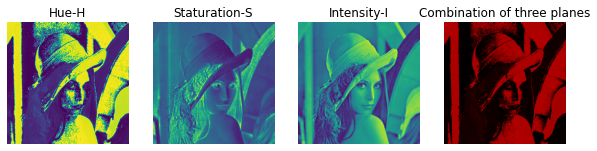

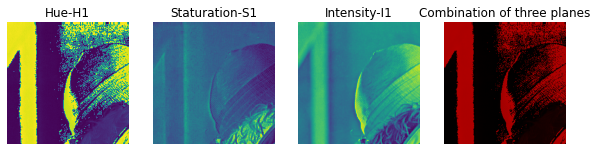

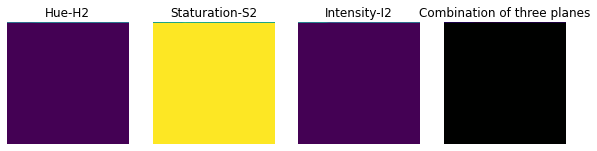

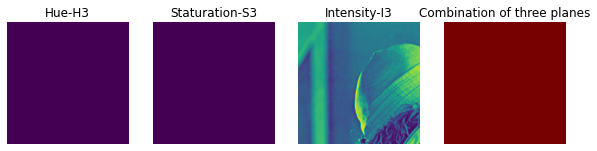

In [122]:
H,H_avg,S,S_avg,I,I_avg=Find_HSI(R,G,B)
H1,H_avg1,S1,S_avg1,I1,I_avg1=Find_HSI(R1,G1,B1)
H2,H_avg2,S2,S_avg2,I2,I_avg2=Find_HSI(R2,G2,B2)
H3,H_avg3,S3,S_avg3,I3,I_avg3=Find_HSI(R3,G3,B3)
list0=['Hue-H','Staturation-S','Intensity-I']
list1=['Hue-H1','Staturation-S1','Intensity-I1']
list2=['Hue-H2','Staturation-S2','Intensity-I2']
list3=['Hue-H3','Staturation-S3','Intensity-I3']
Image_Plot(H,S,I,list0)
Image_Plot(H1,S1,I1,list1)
Image_Plot(H2,S2,I2,list2)
Image_Plot(H3,S3,I3,list3)

Task-1 Results

In [119]:
list=['/content/1.tiff','/content/2.tiff','/content/3.tiff','/content/4.tiff','/content/5.tiff','/content/6.tiff','/content/7.tiff','/content/8.tiff','/content/9.tiff','/content/10.tiff']
for ele in list:
  img=Image.open(ele)
  img=np.array(img,dtype='float32')
  R=img[:,:,0];G=img[:,:,1];B=img[:,:,2]
  R1,G1,B1=task_1(R,G,B)
  H,H_avg,S,S_avg,I,I_avg=Find_HSI(R,G,B)
  H1,H_avg1,S1,S_avg1,I1,I_avg1=Find_HSI(R1,G1,B1)
  print(ele)
  print(' ')
  print('H_avg        : ',round(H_avg,3),'S_avg               : ',round(S_avg,3),'I_avg               : ',round(I_avg,3))
  print('H_avg1       : ',round(H_avg1,3),'S_avg1             : ',round(S_avg1,3),'I_avg1             : ',round(I_avg1,3))
  print('H_avg1-H_avg : ',round(H_avg1-H_avg,3),'S_avg1-S_avg: ',round(S_avg1-S_avg,3),'I_avg1-I_avg: ',round(I_avg1-I_avg,3))
  print(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


/content/1.tiff
 
H_avg        :  95.549 S_avg               :  0.321 I_avg               :  0.13
H_avg1       :  95.279 S_avg1             :  0.321 I_avg1             :  0.065
H_avg1-H_avg :  -0.27 S_avg1-S_avg:  0.0 I_avg1-I_avg:  -0.065
 
/content/2.tiff
 
H_avg        :  55.141 S_avg               :  0.221 I_avg               :  0.462
H_avg1       :  54.837 S_avg1             :  0.221 I_avg1             :  0.23
H_avg1-H_avg :  -0.303 S_avg1-S_avg:  0.0 I_avg1-I_avg:  -0.232
 
/content/3.tiff
 
H_avg        :  93.22 S_avg               :  0.191 I_avg               :  0.551
H_avg1       :  93.344 S_avg1             :  0.191 I_avg1             :  0.276
H_avg1-H_avg :  0.124 S_avg1-S_avg:  -0.0 I_avg1-I_avg:  -0.275
 
/content/4.tiff
 
H_avg        :  138.01 S_avg               :  0.174 I_avg               :  0.656
H_avg1       :  137.944 S_avg1             :  0.175 I_avg1             :  0.328
H_avg1-H_avg :  -0.065 S_avg1-S_avg:  0.0 I_avg1-I_avg:  -0.328
 
/content/5.tiff
 
H_avg    

Task-2 Results

In [120]:
list=['/content/1.tiff','/content/2.tiff','/content/3.tiff','/content/4.tiff','/content/5.tiff','/content/6.tiff','/content/7.tiff','/content/8.tiff','/content/9.tiff','/content/10.tiff']
for ele in list:
  img=Image.open(ele)
  img=np.array(img,dtype='float32')
  R=img[:,:,0];G=img[:,:,1];B=img[:,:,2]
  
  R2,G2,B2=task_2(R,G,B)
  H,H_avg,S,S_avg,I,I_avg=Find_HSI(R,G,B)
  H2,H_avg2,S2,S_avg2,I2,I_avg2=Find_HSI(R2,G2,B2)
  print(ele)
  print(' ')
  print('H_avg        : ',round(H_avg,3),'S_avg               : ',round(S_avg,3),'I_avg               : ',round(I_avg,3))
  print('H_avg2       : ',round(H_avg2,3),'S_avg2             : ',round(S_avg2,3),'I_avg2             : ',round(I_avg2,3))
  print('H_avg2-H_avg : ',round(H_avg2-H_avg,3),'S_avg2-S_avg: ',round(S_avg2-S_avg,3),'I_avg2-I_avg: ',round(I_avg2-I_avg,3))
  print(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


/content/1.tiff
 
H_avg        :  95.549 S_avg               :  0.321 I_avg               :  0.13
H_avg2       :  0.243 S_avg2             :  0.997 I_avg2             :  0.227
H_avg2-H_avg :  -95.306 S_avg2-S_avg:  0.676 I_avg2-I_avg:  0.097
 
/content/2.tiff
 
H_avg        :  55.141 S_avg               :  0.221 I_avg               :  0.462
H_avg2       :  0.543 S_avg2             :  0.997 I_avg2             :  0.76
H_avg2-H_avg :  -54.598 S_avg2-S_avg:  0.776 I_avg2-I_avg:  0.298
 
/content/3.tiff
 
H_avg        :  93.22 S_avg               :  0.191 I_avg               :  0.551
H_avg2       :  0.384 S_avg2             :  1.0 I_avg2             :  0.5
H_avg2-H_avg :  -92.836 S_avg2-S_avg:  0.809 I_avg2-I_avg:  -0.051
 
/content/4.tiff
 
H_avg        :  138.01 S_avg               :  0.174 I_avg               :  0.656
H_avg2       :  0.096 S_avg2             :  0.997 I_avg2             :  0.647
H_avg2-H_avg :  -137.913 S_avg2-S_avg:  0.822 I_avg2-I_avg:  -0.01
 
/content/5.tiff
 
H_avg  

Task-3 Results

In [121]:
list=['/content/1.tiff','/content/2.tiff','/content/3.tiff','/content/4.tiff','/content/5.tiff','/content/6.tiff','/content/7.tiff','/content/8.tiff','/content/9.tiff','/content/10.tiff']
for ele in list:
  img=Image.open(ele)
  img=np.array(img,dtype='float32')
  R=img[:,:,0];G=img[:,:,1];B=img[:,:,2]
  
  R3,G3,B3=task_3(R,G,B)
  H,H_avg,S,S_avg,I,I_avg=Find_HSI(R,G,B)
  H3,H_avg3,S3,S_avg3,I3,I_avg3=Find_HSI(R3,G3,B3)
  print(ele)
  print(' ')
  print('H_avg        : ',round(H_avg,3),'S_avg               : ',round(S_avg,3),'I_avg               : ',round(I_avg,3))
  print('H_avg3       : ',round(H_avg3,3),'S_avg3             : ',round(S_avg3,3),'I_avg3             : ',round(I_avg3,3))
  print('H_avg3-H_avg : ',round(H_avg3-H_avg,3),'S_avg3-S_avg: ',round(S_avg3-S_avg,3),'I_avg3-I_avg: ',round(I_avg3-I_avg,3))
  print(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


/content/1.tiff
 
H_avg        :  95.549 S_avg               :  0.321 I_avg               :  0.13
H_avg3       :  60.0 S_avg3             :  1.0 I_avg3             :  0.036
H_avg3-H_avg :  -35.549 S_avg3-S_avg:  0.679 I_avg3-I_avg:  -0.094
 
/content/2.tiff
 
H_avg        :  55.141 S_avg               :  0.221 I_avg               :  0.462
H_avg3       :  119.491 S_avg3             :  1.0 I_avg3             :  0.129
H_avg3-H_avg :  64.35 S_avg3-S_avg:  0.779 I_avg3-I_avg:  -0.334
 
/content/3.tiff
 
H_avg        :  93.22 S_avg               :  0.191 I_avg               :  0.551
H_avg3       :  119.529 S_avg3             :  1.0 I_avg3             :  0.174
H_avg3-H_avg :  26.31 S_avg3-S_avg:  0.809 I_avg3-I_avg:  -0.377
 
/content/4.tiff
 
H_avg        :  138.01 S_avg               :  0.174 I_avg               :  0.656
H_avg3       :  60.0 S_avg3             :  1.0 I_avg3             :  0.186
H_avg3-H_avg :  -78.01 S_avg3-S_avg:  0.826 I_avg3-I_avg:  -0.471
 
/content/5.tiff
 
H_avg      